In [114]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score, roc_curve, cohen_kappa_score)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

import warnings 
warnings.filterwarnings('ignore')

In [115]:
data= pd.read_csv(r"D:\Jupyter files 1\Churn_Modelling.csv")

In [116]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [117]:
print(f'Rows: {data.shape[0]}')
print(f'Columns: {data.shape[1]} ')

Rows: 10000
Columns: 14 


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Descriptive Analysis

In [120]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [121]:
data.describe(include= 'object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


## Univariate analysis 

In [123]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [124]:
num_cols= ['CreditScore', 'Age', 'Balance','EstimatedSalary']
cat_cols= ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember','Exited']

In [125]:
num_cols

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [126]:
cat_cols

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

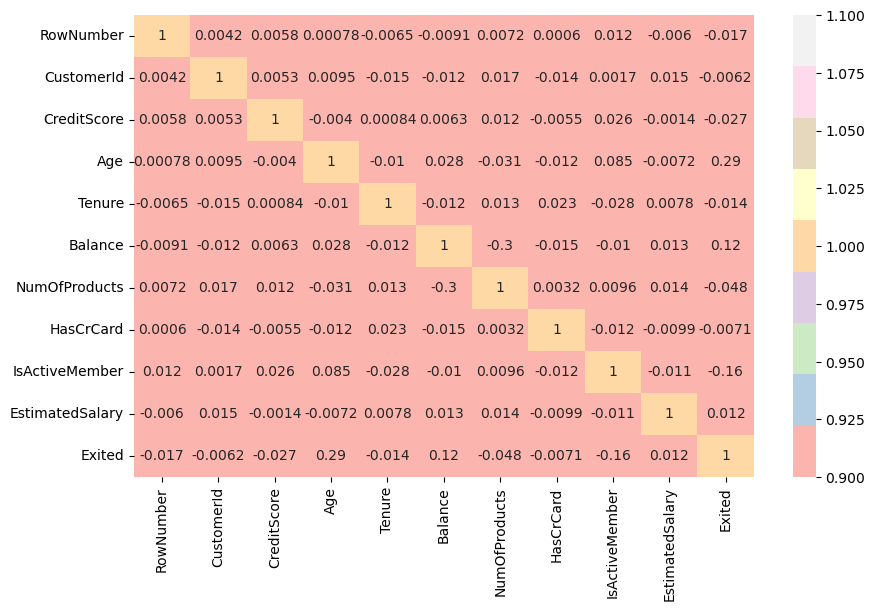

In [127]:
# Explore the correlation among numerical columns 
plt.figure(figsize= (10,6))
sns.heatmap(data.corr(numeric_only= True), vmin= 1, annot= True, cmap= 'Pastel1')
plt.show()

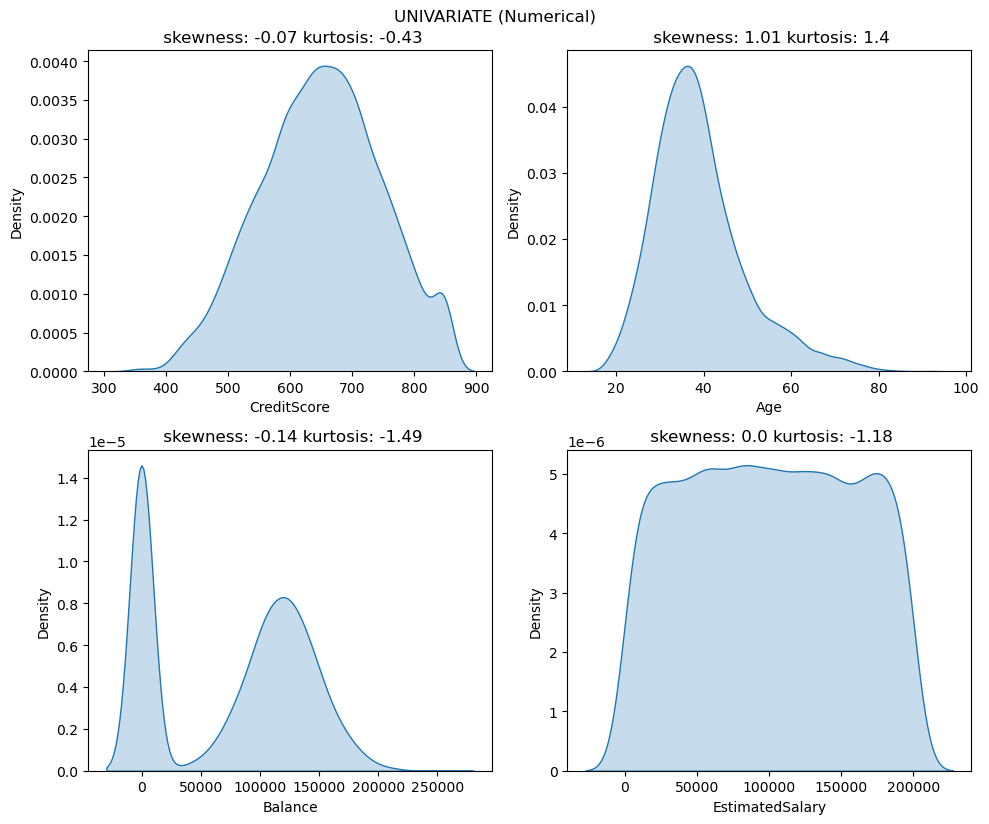

In [128]:
# Explore the numerical columns 

t= 1 
plt.figure(figsize=(10,12))
plt.suptitle('UNIVARIATE (Numerical)')
for i in num_cols:
    s,k= data[i].skew(), data[i].kurt()
    plt.subplot(3,2,t)
    sns.kdeplot(data= data, x= i, fill= True)
    plt.title(f' skewness: {round(s,2)} kurtosis: {round(k,2)}')
    t= t+1 

plt.tight_layout()
plt.show()

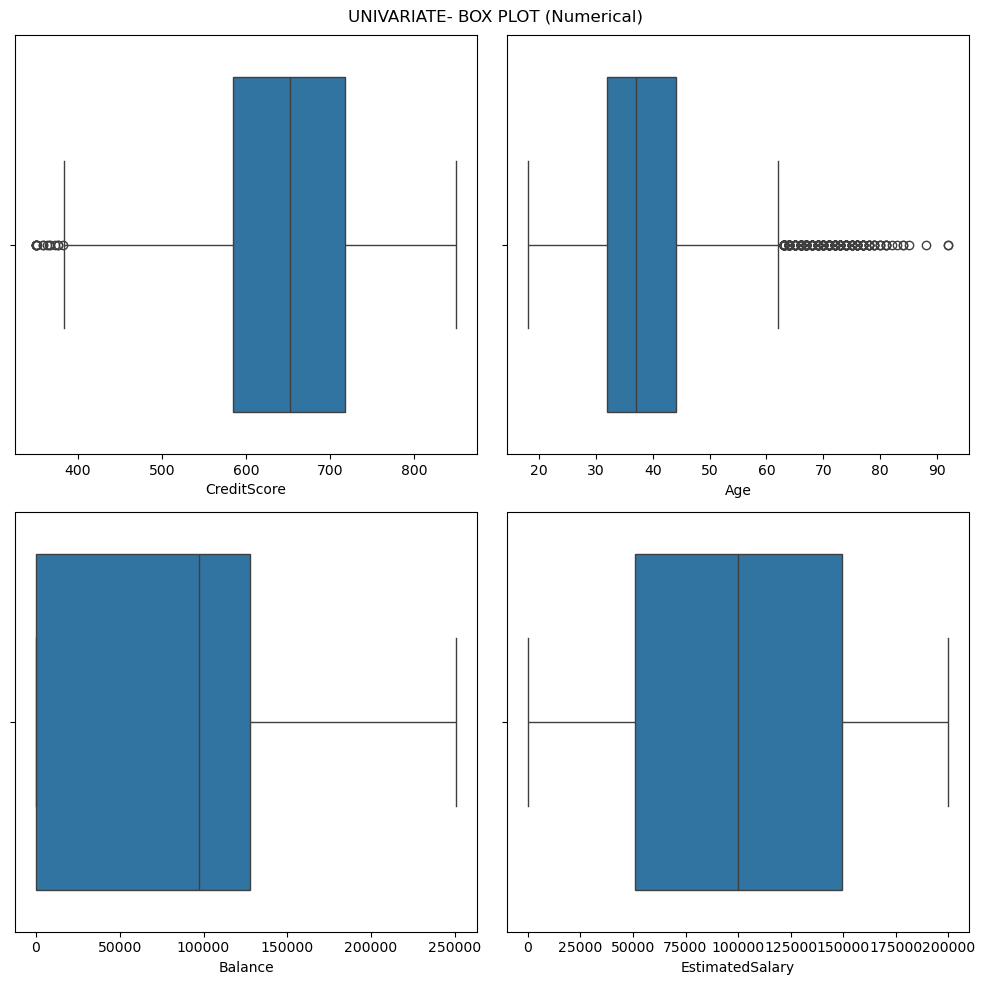

In [129]:
t= 1 
plt.figure(figsize=(10,10))
plt.suptitle('UNIVARIATE- BOX PLOT (Numerical)')
for i in num_cols:
    s,k= data[i].skew(), data[i].kurt()
    plt.subplot(2,2,t)
    sns.boxplot(data= data, x= i, fill= True)
    t= t+1 

plt.tight_layout()
plt.show()

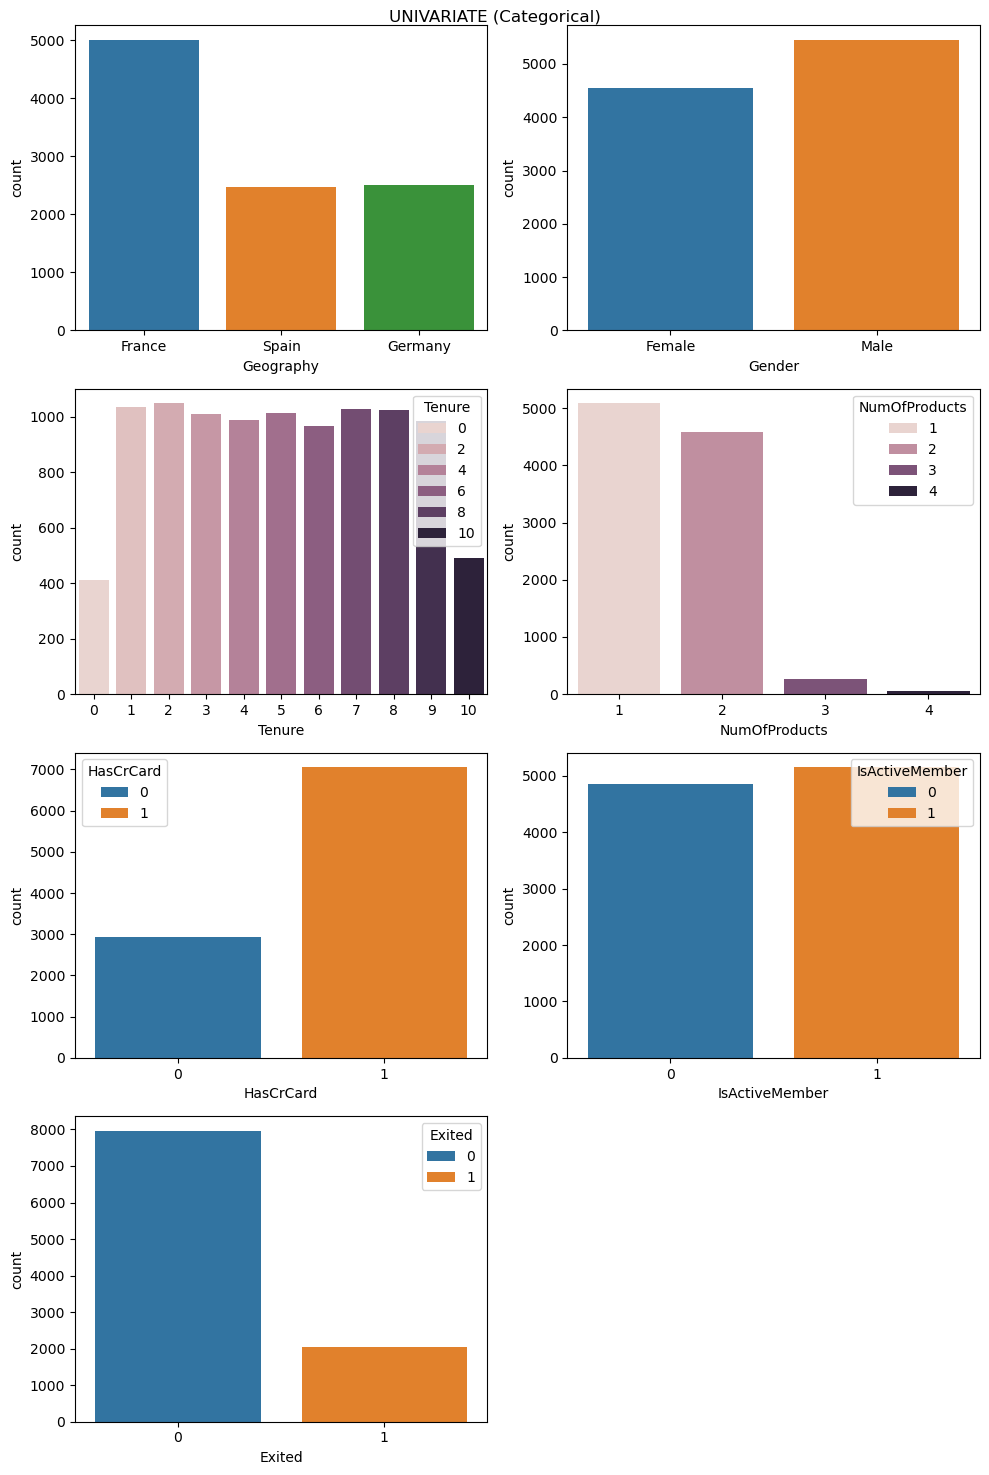

In [130]:
t= 1 
plt.figure(figsize=(10,15))
plt.suptitle('UNIVARIATE (Categorical)')
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data= data, x= i, hue= i)
    t= t+1 

plt.tight_layout()
plt.show()

# Bivariate Analysis

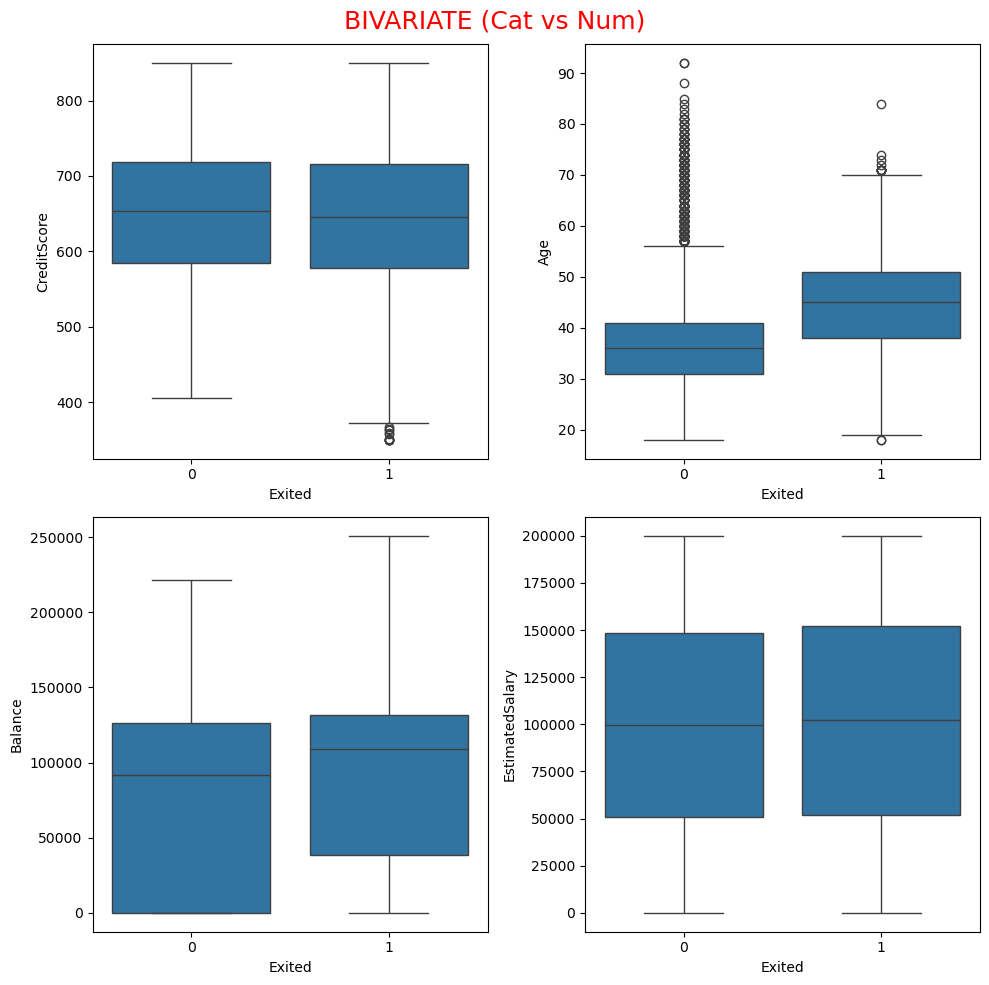

In [132]:
# cat vs num 
t= 1 
plt.figure(figsize=(10,10))
plt.suptitle('BIVARIATE (Cat vs Num)', color= 'red', size= 18)
for i in num_cols: 
    plt.subplot(2,2,t)
    sns.boxplot(data= data, y= i, x= 'Exited')
    t= t+1 
plt.tight_layout()
plt.show()

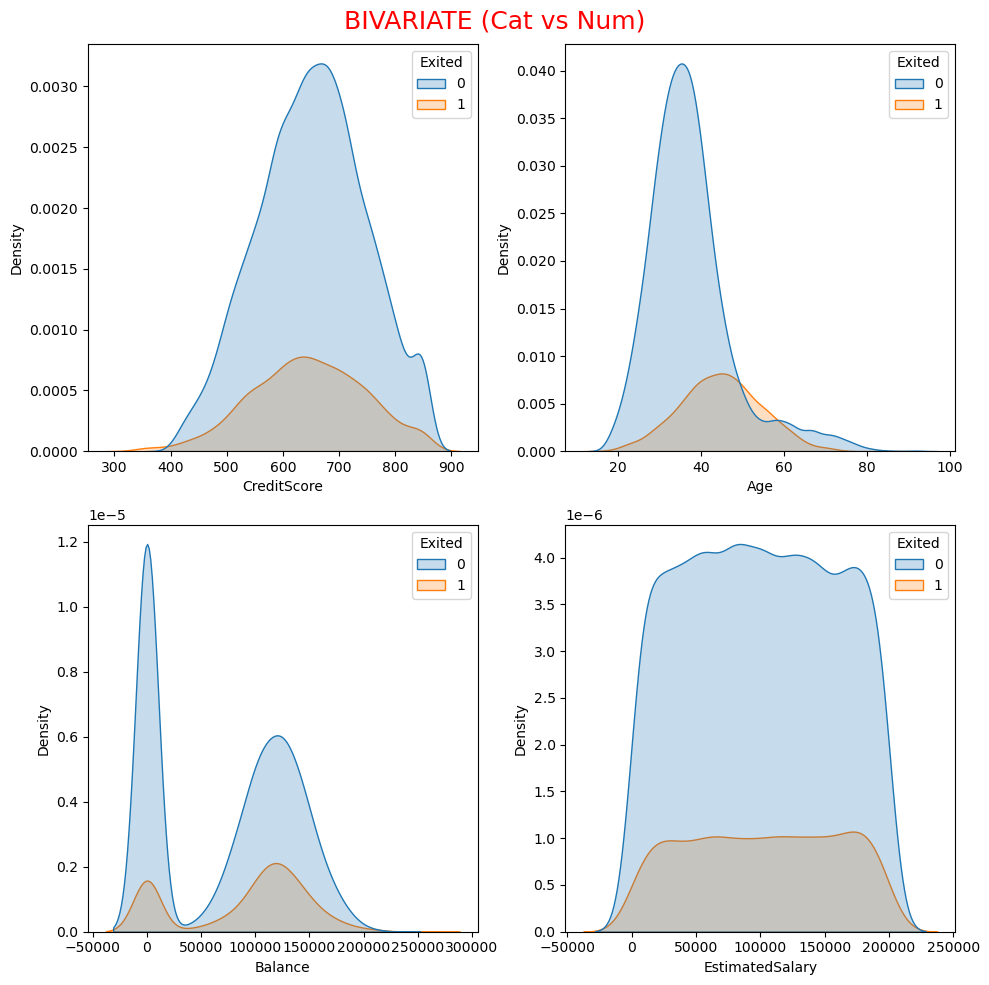

In [133]:
# cat vs num 
t= 1 
plt.figure(figsize=(10,10))
plt.suptitle('BIVARIATE (Cat vs Num)', color= 'red', size= 18)
for i in num_cols: 
    plt.subplot(2,2,t)
    sns.kdeplot(data= data, x= i, hue= 'Exited', fill= True)
    t= t+1 
plt.tight_layout()
plt.show()

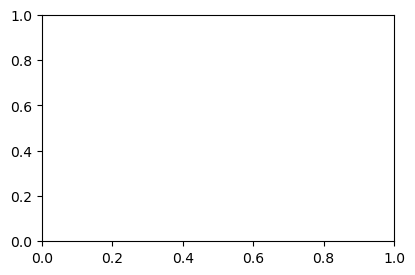

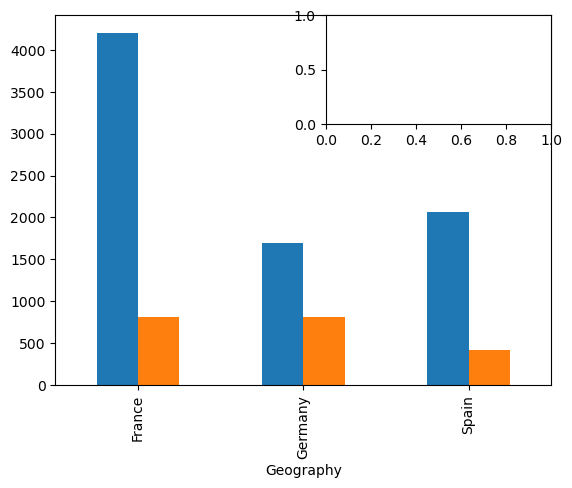

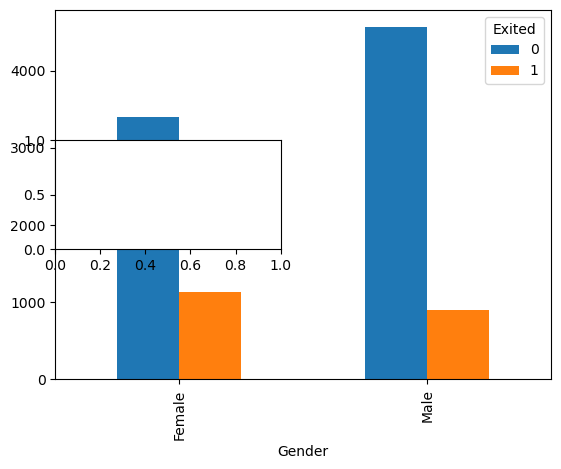

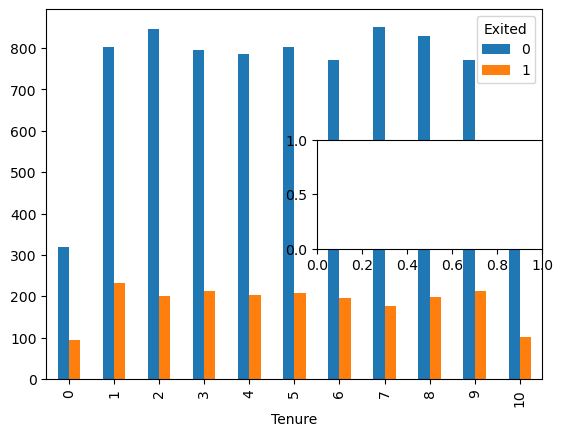

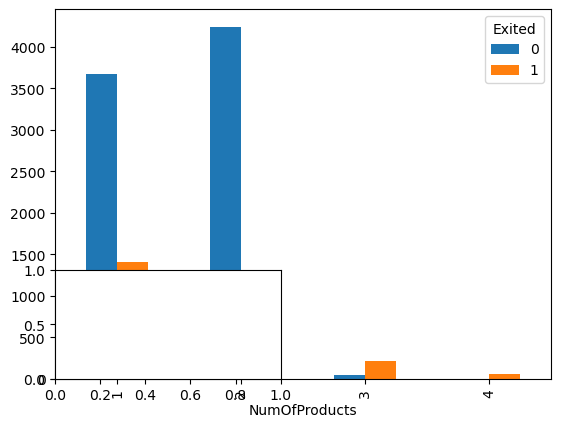

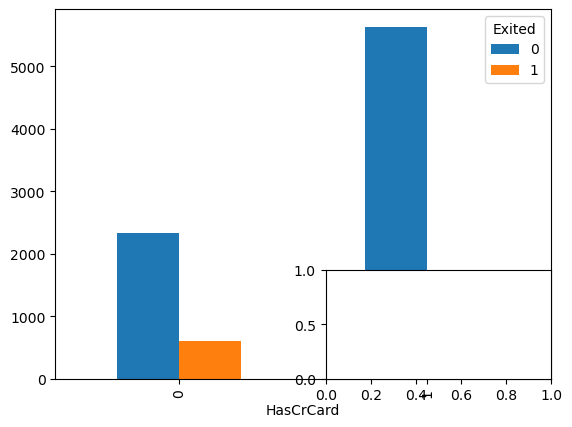

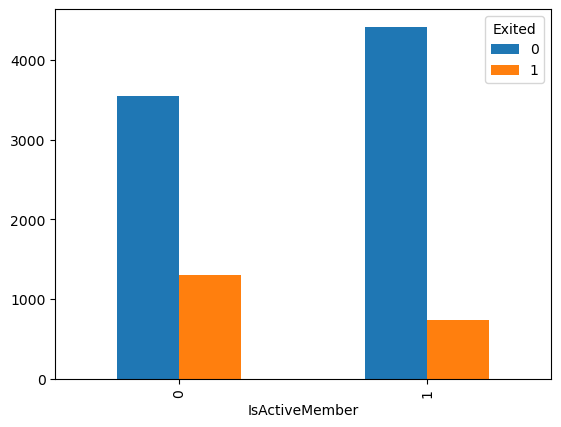

In [134]:
#cat vs cat 
t= 1 
plt.figure(figsize=(10,10))
for i in cat_cols: 
    if i != 'Exited':
        plt.subplot(3,2,t)
        pd.crosstab(data[i], data['Exited']).plot(kind= 'bar')
        t=t+1
        
plt.tight_layout
plt.show()
    

## Multivariate analysis

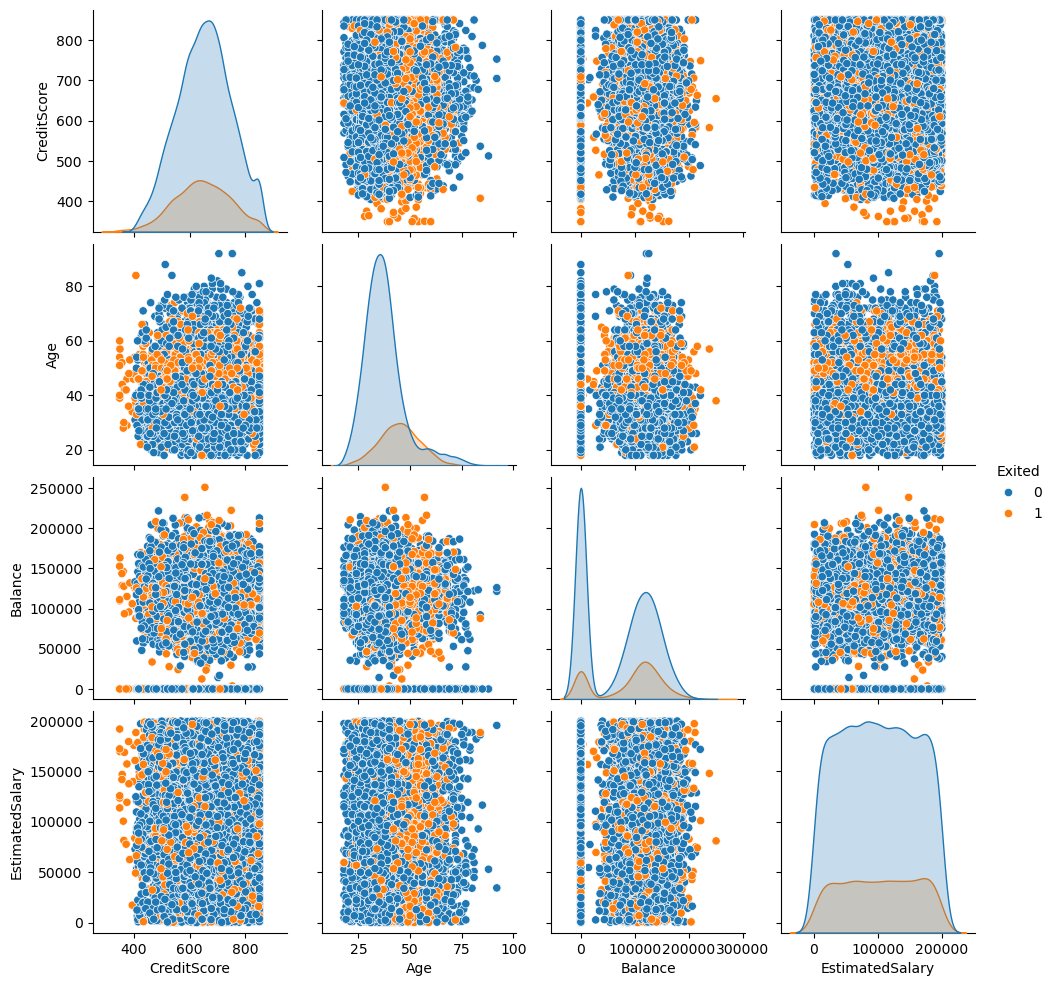

In [136]:
sns.pairplot(data= data,x_vars= num_cols, y_vars= num_cols, hue= 'Exited')
plt.show()

## Data preprocessing

In [138]:
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [139]:
data.drop(columns= ['RowNumber','Surname'], inplace= True)

In [140]:
data.set_index('CustomerId', inplace= True)

In [141]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [142]:
## Missing value treatment 

In [143]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## train test split 

In [145]:
y= data['Exited']
x= data.drop(columns= 'Exited')


In [146]:
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size= 0.8, stratify= y, random_state= 1)

In [147]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(8000, 10) (8000,) (2000, 10) (2000,)


## Outlier treatment 

In [149]:
#cap using iqr method
for i in num_cols: 
    q3, q1= data[i].quantile([0.75,0.25])
    iqr= q3-q1
    ul, ll= q3+1.5*iqr, q1-1.5*iqr
    data[i]= data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

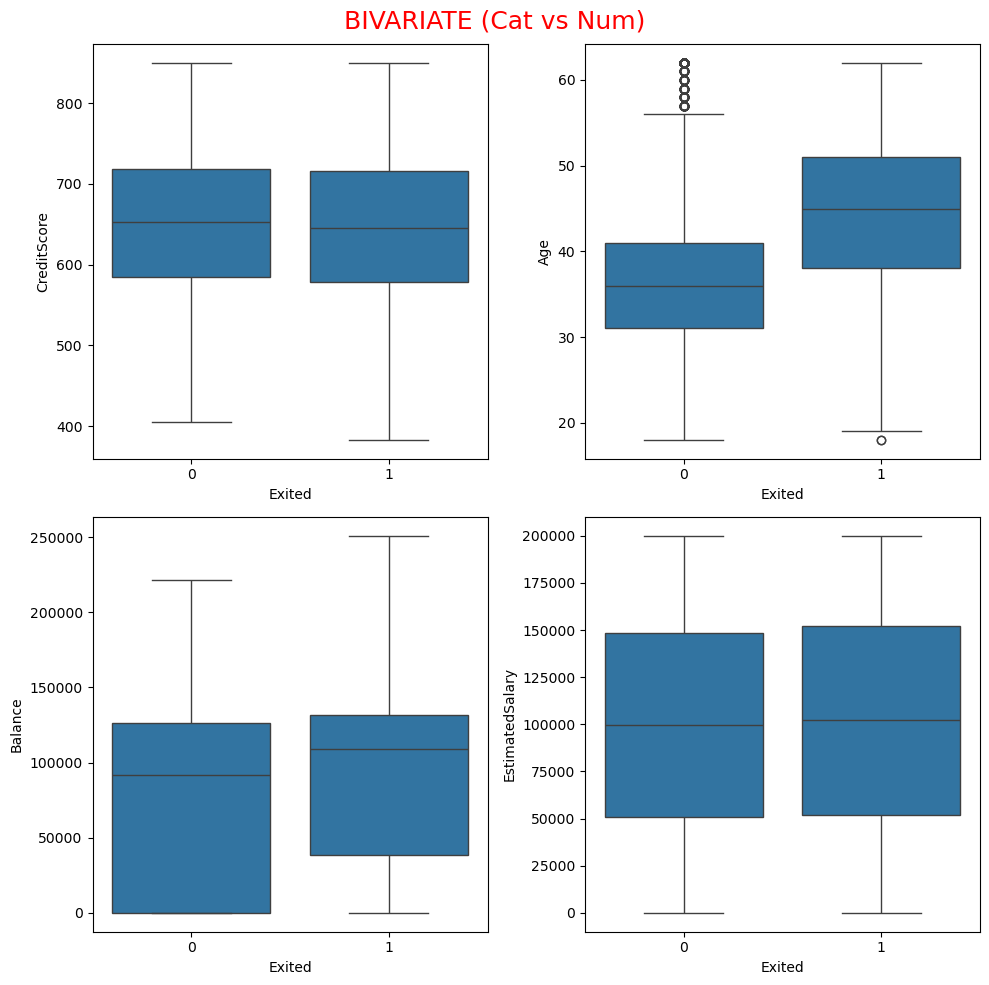

In [150]:
t= 1 
plt.figure(figsize=(10,10))
plt.suptitle('BIVARIATE (Cat vs Num)', color= 'red', size= 18)
for i in num_cols: 
    plt.subplot(2,2,t)
    sns.boxplot(data= data, y= i, x= 'Exited')
    t= t+1 
plt.tight_layout()
plt.show()

In [151]:
num_cols

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [152]:
## Duplicates 

In [153]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,


In [154]:
## Feature engineering 

In [155]:
map_dict= round(x_train['Geography'].value_counts(normalize= True),4).to_dict()
map_dict

{'France': 0.5008, 'Germany': 0.2505, 'Spain': 0.2488}

In [156]:
x_train['Geography']= x_train['Geography'].map(map_dict)
x_test['Geography']= x_test['Geography'].map(map_dict)

In [157]:
# Dummy encoding 
x_train= pd.get_dummies(x_train, columns= ['Gender'], drop_first= True)
x_test= pd.get_dummies(x_test, columns= ['Gender'], drop_first= True)

In [158]:
x_train.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
CustomerId,,,,,,,,,,
15578462,596,0.2488,76,9,134208.25,1,1,1,13455.43,False
15747974,614,0.5008,49,1,0.00,2,1,0,192440.54,True
15727299,445,0.2488,62,1,64119.38,1,1,1,76569.64,True
15722122,544,0.5008,40,7,0.00,1,0,1,161076.92,False
15668943,746,0.5008,37,2,0.00,2,1,0,143194.05,True


In [159]:
x_test.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
CustomerId,,,,,,,,,,
15595160,413,0.2488,35,2,0.00,2,1,1,60972.84,True
15572792,535,0.2488,35,8,118989.92,1,1,1,135536.72,True
15797692,659,0.5008,33,7,89939.62,1,1,0,136540.09,False
15701160,556,0.2505,43,4,125890.72,1,1,1,74854.97,False
15569976,754,0.2505,65,1,136186.44,1,1,1,121529.59,True


## Feature scaling

In [161]:
x_train_s= x_train.copy()
x_test_s= x_test.copy()

In [162]:
scaler= StandardScaler()
x_train_s[num_cols]= scaler.fit_transform(x_train_s[num_cols])
x_test_s[num_cols]= scaler.transform(x_test_s[num_cols])

In [163]:
x_test_s.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
CustomerId,,,,,,,,,,
15595160,-2.448905,0.2488,-0.371278,2,-1.219862,2,1,1,-0.676944,True
15572792,-1.187368,0.2488,-0.371278,8,0.682452,1,1,1,0.622771,True
15797692,0.094849,0.5008,-0.560930,7,0.218020,1,1,0,0.640261,False
15701160,-0.970218,0.2505,0.387328,4,0.792777,1,1,1,-0.434966,False
15569976,1.077193,0.2505,2.473494,1,0.957376,1,1,1,0.378614,True


In [164]:
x_test

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
CustomerId,,,,,,,,,,
15595160,413,0.2488,35,2,0.00,2,1,1,60972.84,True
15572792,535,0.2488,35,8,118989.92,1,1,1,135536.72,True
15797692,659,0.5008,33,7,89939.62,1,1,0,136540.09,False
15701160,556,0.2505,43,4,125890.72,1,1,1,74854.97,False
15569976,754,0.2505,65,1,136186.44,1,1,1,121529.59,True
...,...,...,...,...,...,...,...,...,...,...
15674671,551,0.2488,76,2,128410.71,2,1,1,181718.73,True
15718106,625,0.5008,34,6,0.00,2,0,0,197283.20,True
15690182,635,0.2505,37,5,113488.68,1,1,0,95611.74,True


## Predictive modeling 

In [166]:
cw_0= len(y_train)/(2*y_train.value_counts()[0])

In [167]:
cw_1= len(y_train)/(2*y_train.value_counts()[1])

In [168]:
model_lr= LogisticRegression(class_weight= {0:cw_0, 1:cw_1})

In [169]:
model_lr.fit(x_train, y_train)

LogisticRegression(class_weight={0: 0.6279434850863422, 1: 2.4539877300613497})

In [170]:
pred_lr_s= model_lr.predict_proba(x_test)[:,1]
pred_lr_h= model_lr.predict(x_test)

In [171]:
pred_lr_h= (pred_lr_s>0.450026).astype(int)

In [172]:
print(confusion_matrix(y_test, pred_lr_h))

[[895 698]
 [ 99 308]]


In [173]:
print(classification_report(y_test, pred_lr_h))

              precision    recall  f1-score   support

           0       0.90      0.56      0.69      1593
           1       0.31      0.76      0.44       407

    accuracy                           0.60      2000
   macro avg       0.60      0.66      0.56      2000
weighted avg       0.78      0.60      0.64      2000



In [174]:
print(cohen_kappa_score(y_test, pred_lr_h))

0.20582567225810566


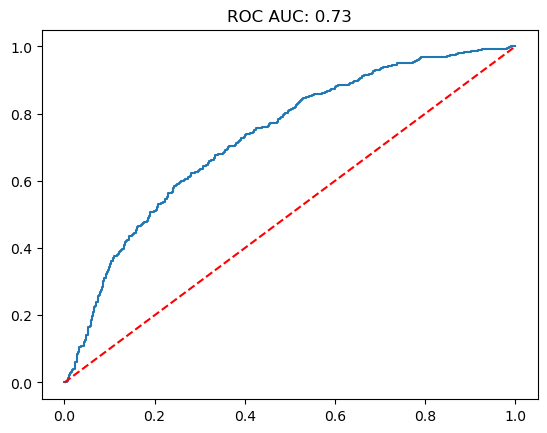

In [175]:
# ROC Curve 
fpr, tpr, thres= roc_curve(y_test, pred_lr_s)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], color= 'red', ls= '--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test, pred_lr_s),2)}')
plt.show()

In [176]:
# WE CAN FIT THIS MODEL AS A BASE MODEL

In [177]:
# YODENS INDEX
pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'THRESHOLD': thres, 'YODENS INDEX': tpr*(1-fpr)}).sort_values(by= 'YODENS INDEX', ascending= True)

,FPR,TPR,THRESHOLD,YODENS INDEX
0,0.000000,0.000000,inf,0.000000
2,0.005022,0.000000,0.888405,0.000000
548,1.000000,1.000000,0.095001,0.000000
1,0.000628,0.000000,0.934284,0.000000
4,0.005650,0.002457,0.885815,0.002443
...,...,...,...,...
287,0.280603,0.621622,0.525393,0.447193
323,0.340239,0.678133,0.495199,0.447406
325,0.341494,0.680590,0.494759,0.448172
289,0.281230,0.624079,0.525327,0.448569


One possible reason for the above scores can be class imbalance. we have more data in class 0 and less data in class 1. More data means better learning 

we can use 
* Class weights
* Oversampling/Undersampling

In [179]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

# Sampling to treat class imbalance


In [181]:
# pip install imblearn

from imblearn.over_sampling import RandomOverSampler, SMOTE 
from imblearn.under_sampling import RandomUnderSampler

In [182]:
y_train.value_counts(normalize= True)

Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64

In [183]:
sampler= RandomOverSampler()
x_train_os, y_train_os= sampler.fit_resample(x_train, y_train)

In [184]:
sampler = RandomUnderSampler() 
x_train_us, y_train_us= sampler.fit_resample(x_train, y_train)

In [185]:
y_train_us.value_counts()

Exited
0    1630
1    1630
Name: count, dtype: int64

In [186]:
sampler= SMOTE(sampling_strategy= 0.7)

In [187]:
x_train_sm, y_train_sm= sampler.fit_resample(x_train, y_train)

In [188]:
y_train_sm.value_counts(normalize= True)

Exited
0    0.588235
1    0.411765
Name: proportion, dtype: float64

In [189]:
# Re fir the logistic regression with oversampled data 

model_lr= LogisticRegression()

In [190]:
model_lr.fit(x_train_sm, y_train_sm)

LogisticRegression()

In [191]:
pred_lr_s= model_lr.predict_proba(x_test)[:,1]
pred_lr_h= (pred_lr_s>0.5).astype(int)

In [192]:
print(confusion_matrix(y_test, pred_lr_h))

[[1286  307]
 [ 215  192]]


In [193]:
print(classification_report(y_test, pred_lr_h))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1593
           1       0.38      0.47      0.42       407

    accuracy                           0.74      2000
   macro avg       0.62      0.64      0.63      2000
weighted avg       0.76      0.74      0.75      2000



In [194]:
print(cohen_kappa_score(y_test, pred_lr_h))

0.25736975161721254


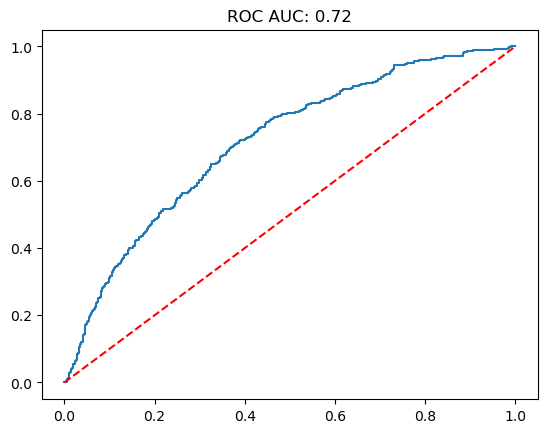

In [195]:
# ROC Curve 
fpr, tpr, thres= roc_curve(y_test, pred_lr_s)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], color= 'red', ls= '--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test, pred_lr_s),2)}')
plt.show()

In [196]:
# YODENS INDEX
pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'THRESHOLD': thres, 'YODENS INDEX': tpr*(1-fpr)}).sort_values(by= 'YODENS INDEX', ascending= True)

,FPR,TPR,THRESHOLD,YODENS INDEX
0,0.000000,0.000000,inf,0.000000
2,0.004394,0.000000,0.876124,0.000000
612,1.000000,1.000000,0.055206,0.000000
1,0.000628,0.000000,0.922886,0.000000
4,0.005650,0.002457,0.858043,0.002443
...,...,...,...,...
409,0.389203,0.722359,0.375488,0.441215
387,0.364721,0.695332,0.388010,0.441730
399,0.377903,0.710074,0.380449,0.441734
391,0.369115,0.700246,0.386056,0.441775


## KNN Model 

In [198]:
model_knn= KNeighborsClassifier(n_neighbors= 7, weights= 'distance')

In [199]:
x_train_s_os= x_train_os.copy()
x_train_s_os[num_cols]= scaler.transform(x_train_os[num_cols])

In [200]:
model_knn.fit(x_train_s, y_train)  # Always pass scaled data

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [201]:
pred_knn_s= model_knn.predict_proba(x_test_s)[:,1]  #Scaled data
pred_knn_h= (pred_knn_s>0.5).astype(int)


In [202]:
print(confusion_matrix(y_test, pred_knn_h))

[[1520   73]
 [ 281  126]]


In [203]:
print(classification_report(y_test, pred_knn_h))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1593
           1       0.63      0.31      0.42       407

    accuracy                           0.82      2000
   macro avg       0.74      0.63      0.66      2000
weighted avg       0.80      0.82      0.80      2000



In [204]:
print(cohen_kappa_score(y_test, pred_knn_h))

0.3257232760706047


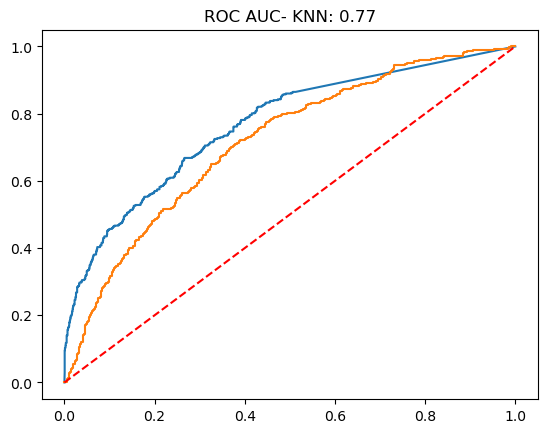

In [205]:
# ROC Curve 
fpr, tpr, thres= roc_curve(y_test, pred_lr_s)
fpr_knn, tpr_knn, thes_knn= roc_curve(y_test, pred_knn_s)
plt.plot(fpr_knn, tpr_knn, label= 'KNN')
plt.plot(fpr,tpr, label = 'LogReg')
plt.plot([0,1],[0,1], color= 'red', ls= '--')
plt.title(f'ROC AUC- KNN: {round(roc_auc_score(y_test, pred_knn_s),2)}')
plt.show()

In [206]:
# Hyperparameter tuning for 

## Niave bayes 

In [208]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [209]:
model_nb= GaussianNB()

In [210]:
model_nb.fit(x_train_os, y_train_os)

GaussianNB()

In [211]:
pred_nb_s= model_nb.predict_proba(x_test)[:,1]
pred_nb_h= (pred_nb_s>0.5).astype(int)

In [212]:
print(classification_report(y_test, pred_nb_h))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1593
           1       0.39      0.65      0.49       407

    accuracy                           0.72      2000
   macro avg       0.64      0.69      0.65      2000
weighted avg       0.79      0.72      0.74      2000



In [213]:
print(cohen_kappa_score(y_test, pred_nb_h))

0.3096336258878777


In [214]:
print(roc_auc_score(y_test, pred_nb_h))

0.6940399567518211


## Decision tree

In [216]:
model_dt= DecisionTreeClassifier(criterion= 'entropy', max_leaf_nodes= 6, class_weight= 'balanced')

In [217]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_leaf_nodes=6)

In [218]:
pred_dt_s= model_dt.predict_proba(x_test)[:,-1]
pred_dt_h= (pred_dt_s>0.5).astype(int)

In [219]:
print(classification_report(y_test, pred_dt_h))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1593
           1       0.42      0.68      0.52       407

    accuracy                           0.74      2000
   macro avg       0.66      0.72      0.67      2000
weighted avg       0.81      0.74      0.76      2000



In [220]:
print(roc_auc_score(y_test, pred_dt_h))

0.7209960345553567


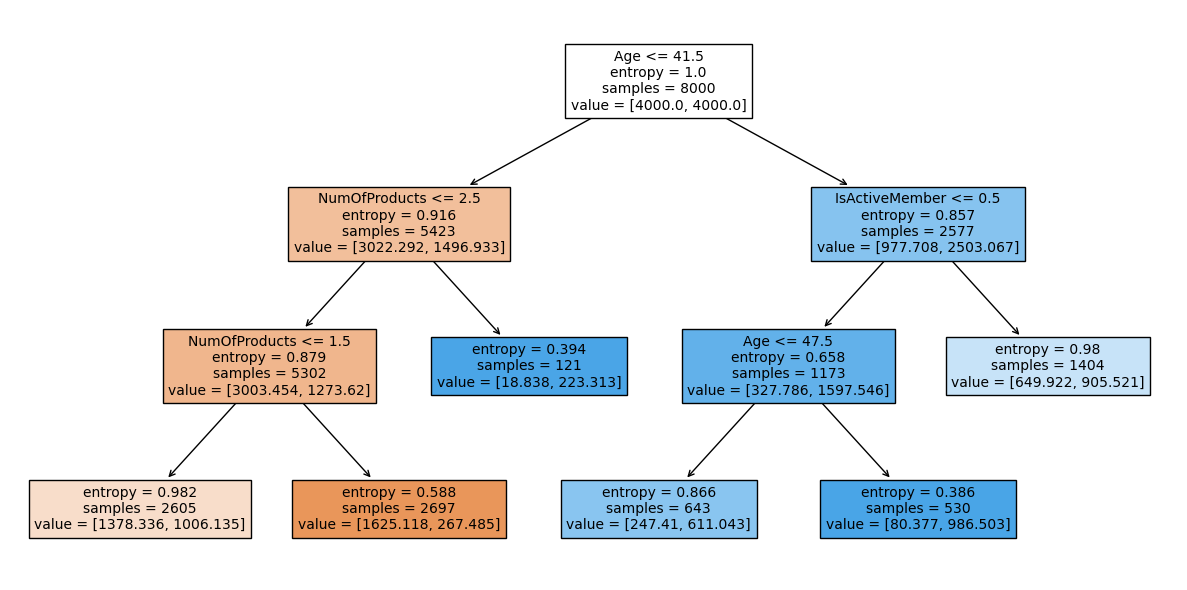

In [221]:
plt.figure(figsize=(12,6))
plot_tree(model_dt, feature_names= x_train.columns.to_list(), fontsize= 10, filled= True)
plt.tight_layout()
plt.show()

In [222]:
# Tune the DT

In [223]:
grid= {'max_depth': [4,5,6,7,8,9,10,15], 'min_samples_split': [50,100,150,200,250,500]}

In [224]:
gscv= GridSearchCV(estimator= DecisionTreeClassifier(class_weight= 'balanced'), 
                   cv= 5, scoring= 'roc_auc', verbose= 3, param_grid= grid)

In [225]:
gscv.fit(x_train,y_train )

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .max_depth=4, min_samples_split=50;, score=0.823 total time=   0.0s
[CV 2/5] END .max_depth=4, min_samples_split=50;, score=0.812 total time=   0.0s
[CV 3/5] END .max_depth=4, min_samples_split=50;, score=0.806 total time=   0.0s
[CV 4/5] END .max_depth=4, min_samples_split=50;, score=0.791 total time=   0.0s
[CV 5/5] END .max_depth=4, min_samples_split=50;, score=0.832 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_split=100;, score=0.823 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_split=100;, score=0.815 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_split=100;, score=0.812 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_split=100;, score=0.791 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_split=100;, score=0.831 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_split=150;, score=0.823 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_split=150

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 15],
                         'min_samples_split': [50, 100, 150, 200, 250, 500]},
             scoring='roc_auc', verbose=3)

In [226]:
gscv.best_score_

0.8348376207491018

In [227]:
gscv.best_params_

{'max_depth': 6, 'min_samples_split': 200}

In [228]:
model_dt_final= DecisionTreeClassifier(class_weight= 'balanced', **gscv.best_params_)

In [229]:
model_dt_final.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=200)

In [230]:
pred_dt_s_f = model_dt_final.predict_proba(x_test)[:,1]
pred_dt_h_f = (pred_dt_s_f>0.5).astype(int)

In [231]:
print(classification_report(y_test, pred_dt_h_f))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1593
           1       0.45      0.70      0.55       407

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.70      2000
weighted avg       0.82      0.77      0.78      2000



In [232]:
print(roc_auc_score(y_test, pred_dt_h_f))

0.7406080965402999


In [233]:
print(cohen_kappa_score(y_test, pred_dt_h_f))

0.39999769229881654


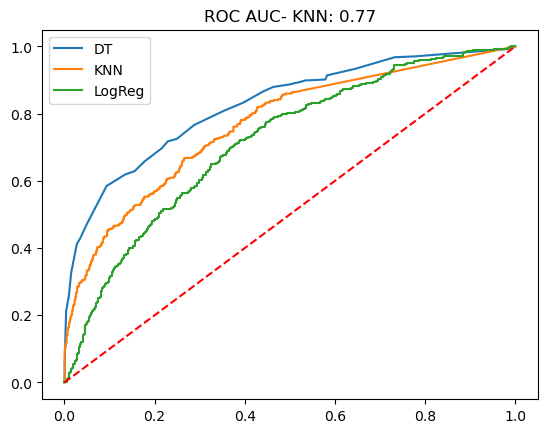

In [234]:
# ROC Curve
fpr, tpr, thres= roc_curve(y_test, pred_lr_s)
fpr_knn, tpr_knn, thes_knn= roc_curve(y_test, pred_knn_s)
fpr_dt, tpr_dt, thres_dt= roc_curve(y_test, pred_dt_s_f)

plt.plot(fpr_dt, tpr_dt, label= 'DT')
plt.plot(fpr_knn, tpr_knn, label= 'KNN')
plt.plot(fpr,tpr, label = 'LogReg')
plt.plot([0,1],[0,1], color= 'red', ls= '--')

plt.title(f'ROC AUC- KNN: {round(roc_auc_score(y_test, pred_knn_s),2)}')
plt.legend()
plt.show()

In [235]:
pd.DataFrame(model_dt_final.feature_importances_, index= x_train.columns.sort_values(ascending= True))

,0
Age,0.000000
Balance,0.022245
CreditScore,0.468083
EstimatedSalary,0.001001
Gender_Male,0.060669
Geography,0.351473
HasCrCard,0.000000
IsActiveMember,0.078778
NumOfProducts,0.002092
Tenure,0.015657


We can remove the columns that have the least or zero feature importance from the model

## Ensemble Models

### Bagging

In [239]:
model_bagging= BaggingClassifier(estimator= DecisionTreeClassifier(class_weight=  'balanced', max_depth= 3), n_estimators= 3)

In [240]:
model_bagging.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=3),
                  n_estimators=3)

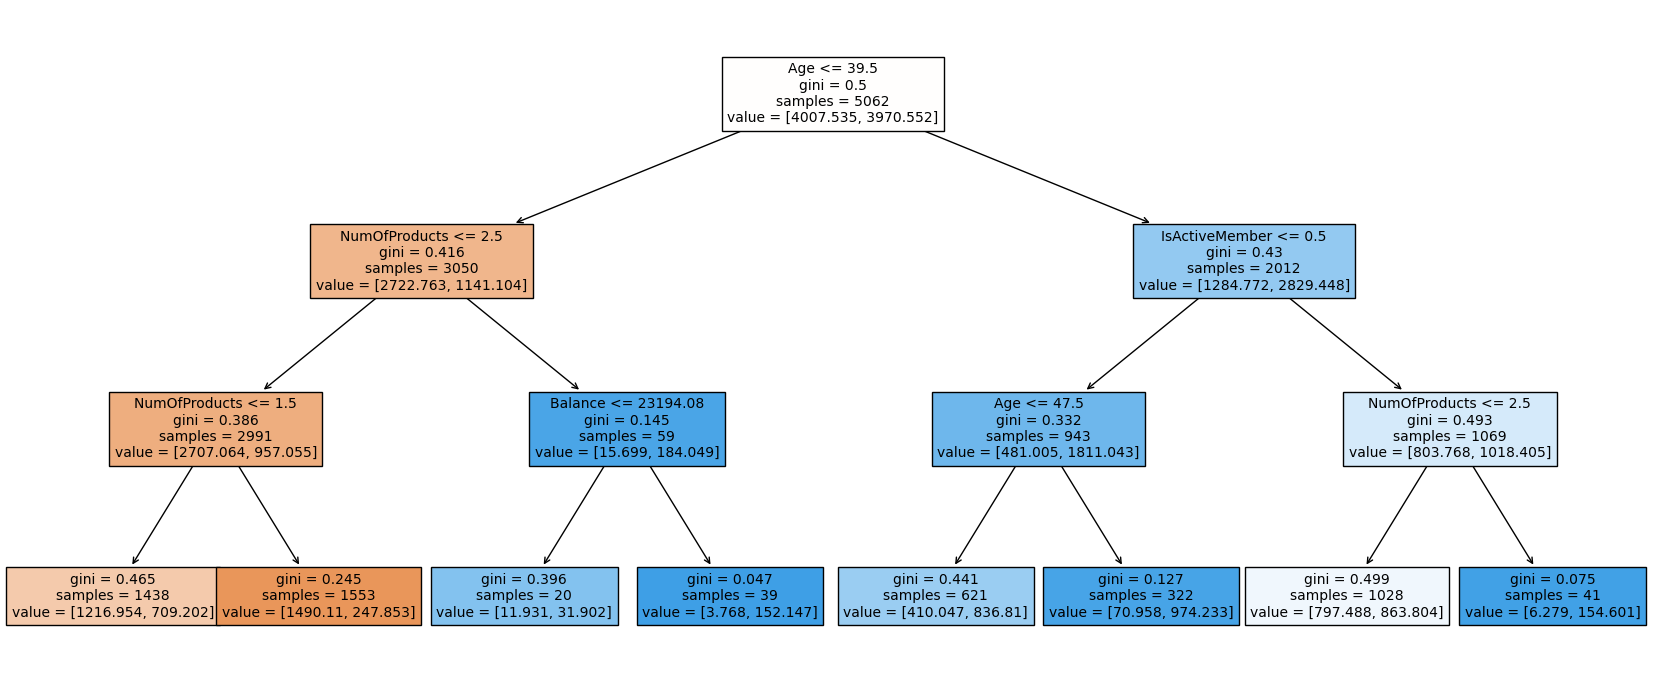

In [241]:
plt.figure(figsize= (17,7))
plot_tree(model_bagging[0], feature_names=x_train.columns.to_list(), fontsize= 10, filled= True)
plt.tight_layout()
plt.show()

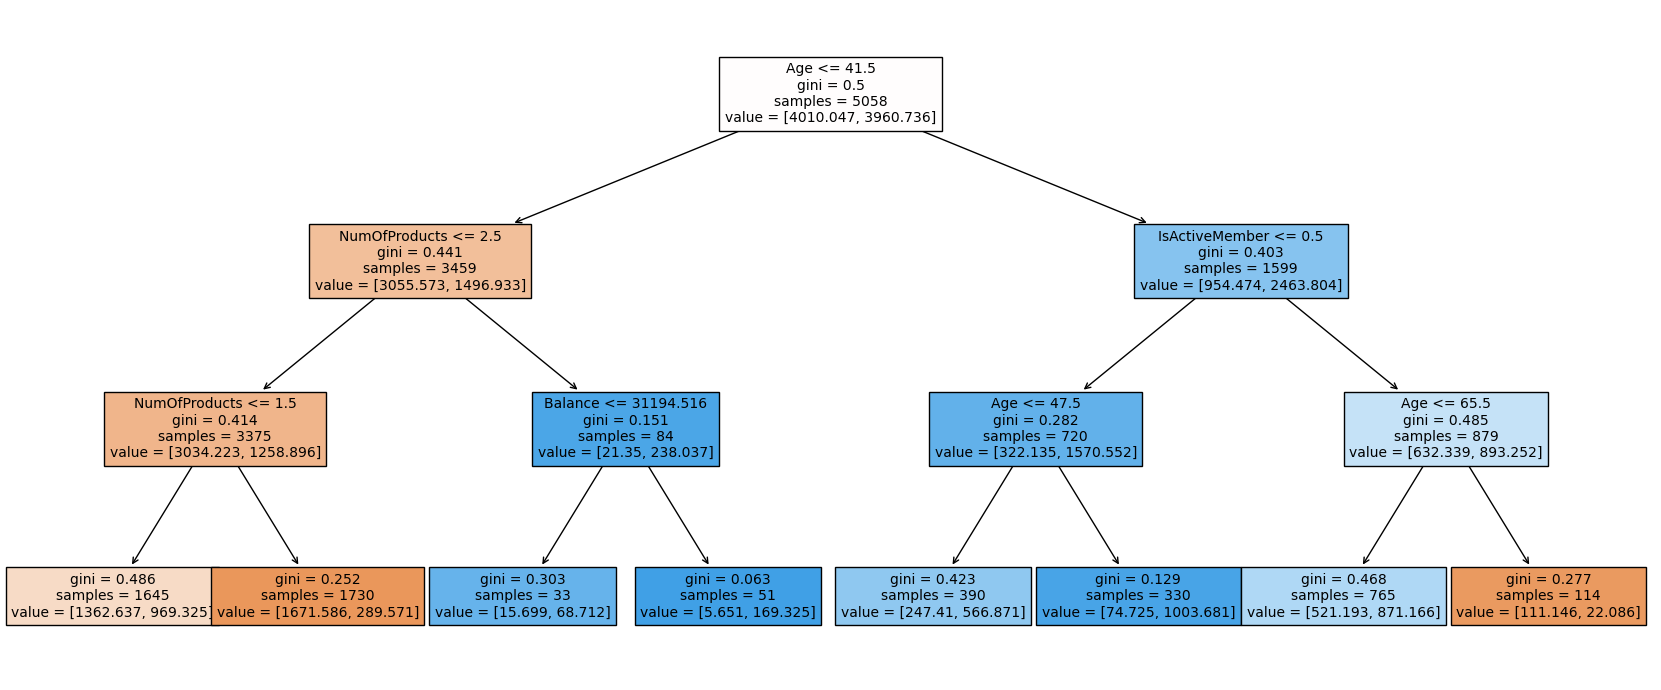

In [242]:
plt.figure(figsize= (17,7))
plot_tree(model_bagging[2], feature_names=x_train.columns.to_list(), fontsize= 10, filled= True)
plt.tight_layout()
plt.show()

In [243]:
pred_bag_s= model_bagging.predict_proba(x_test)[:,1]
pred_b_h= (pred_bag_s>0.5).astype(int)

In [244]:
print(classification_report(y_test, pred_b_h))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1593
           1       0.44      0.69      0.54       407

    accuracy                           0.76      2000
   macro avg       0.67      0.73      0.69      2000
weighted avg       0.81      0.76      0.77      2000



## Random Forest

Special case of bagging where base model is tree

In [247]:
model_rf= RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features=None, oob_score= True, max_samples= 0.8)

In [248]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       max_samples=0.8, oob_score=True)

In [249]:
model_rf.oob_score_

0.853875

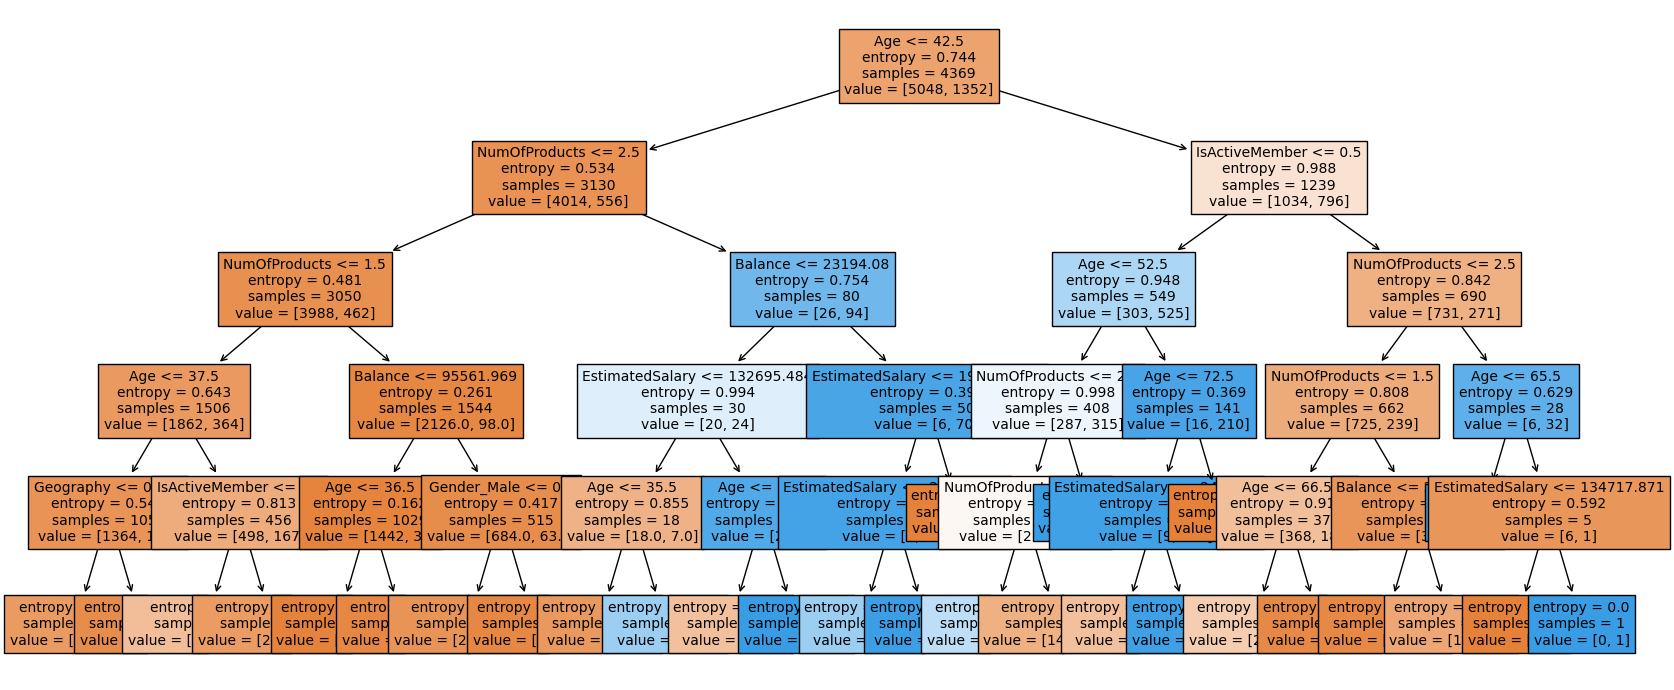

In [250]:
plt.figure(figsize= (17,7))
plot_tree(model_rf[0], feature_names=x_train.columns.to_list(), fontsize= 10, filled= True)
plt.tight_layout()
plt.show()

In [251]:
pred_rf_s= model_rf.predict_proba(x_test)[:,1]
pred_rf_h= (pred_rf_s>0.5).astype(int)

In [252]:
print(classification_report(y_test, pred_rf_h))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [253]:
cohen_kappa_score(y_test, pred_rf_h)

0.4886227698017135

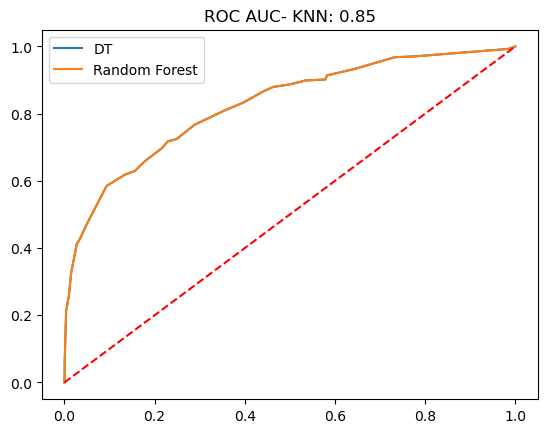

In [254]:
fpr_dt, tpr_dt, thres_dt= roc_curve(y_test, pred_dt_s_f)
fpr_rf, tpr_rf, thres_rf= roc_curve(y_test, pred_rf_s)

plt.plot(fpr_dt, tpr_dt, label= 'DT')
plt.plot(fpr_dt, tpr_dt, label= 'Random Forest')
plt.plot([0,1],[0,1], color= 'red', ls= '--')

plt.title(f'ROC AUC- KNN: {round(roc_auc_score(y_test, pred_rf_s),2)}')
plt.legend()
plt.show()

In [255]:
# fine tuning random forest
grid= {'n_estimators': [90,100,110,120], 'max_depth': [8,9,10]}

In [256]:
gscv= GridSearchCV(estimator= RandomForestClassifier(), cv= 5, scoring= 'roc_auc', param_grid= grid, verbose=3)

In [257]:
gscv.fit(x_train, y_train)
# try at home taking too much time

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......max_depth=8, n_estimators=90;, score=0.865 total time=   0.7s
[CV 2/5] END ......max_depth=8, n_estimators=90;, score=0.860 total time=   0.5s
[CV 3/5] END ......max_depth=8, n_estimators=90;, score=0.851 total time=   0.4s
[CV 4/5] END ......max_depth=8, n_estimators=90;, score=0.847 total time=   0.5s
[CV 5/5] END ......max_depth=8, n_estimators=90;, score=0.862 total time=   0.5s
[CV 1/5] END .....max_depth=8, n_estimators=100;, score=0.867 total time=   0.7s
[CV 2/5] END .....max_depth=8, n_estimators=100;, score=0.862 total time=   0.6s
[CV 3/5] END .....max_depth=8, n_estimators=100;, score=0.855 total time=   0.8s
[CV 4/5] END .....max_depth=8, n_estimators=100;, score=0.841 total time=   1.0s
[CV 5/5] END .....max_depth=8, n_estimators=100;, score=0.863 total time=   0.6s
[CV 1/5] END .....max_depth=8, n_estimators=110;, score=0.864 total time=   0.8s
[CV 2/5] END .....max_depth=8, n_estimators=110;

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10],
                         'n_estimators': [90, 100, 110, 120]},
             scoring='roc_auc', verbose=3)

In [258]:
gscv.best_params_

{'max_depth': 9, 'n_estimators': 110}

In [259]:
gscv.best_score_

0.859051728289239

In [260]:
model_rf_final = RandomForestClassifier(**gscv.best_params_)


In [261]:
model_rf_final.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=110)

In [262]:
pred_rf_final_s= model_rf_final.predict_proba(x_test)[:,1]
pred_rf_final_h= (pred_rf_final_s>0.5).astype(int)

In [263]:
print(classification_report(y_test, pred_rf_final_h))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.83      0.42      0.56       407

    accuracy                           0.86      2000
   macro avg       0.85      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



In [264]:
print(cohen_kappa_score(y_test, pred_rf_final_h))

0.48671520459418305


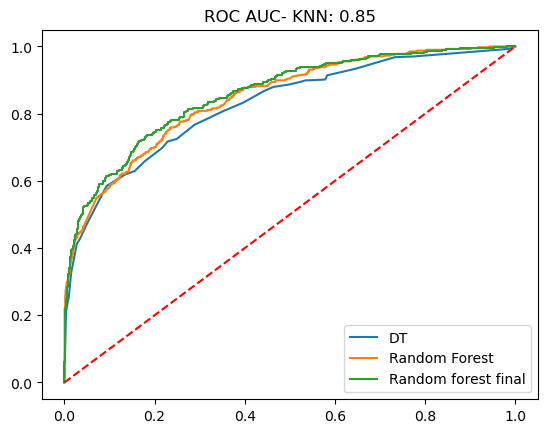

In [265]:
fpr_dt, tpr_dt, thres_dt= roc_curve(y_test, pred_dt_s_f)
fpr_rf_f, tpr_rf_f, thres_rf_f= roc_curve(y_test, pred_rf_final_s)


plt.plot(fpr_dt, tpr_dt, label= 'DT')
plt.plot(fpr_rf, tpr_rf, label= 'Random Forest')
plt.plot(fpr_rf_f, tpr_rf_f, label = 'Random forest final')
plt.plot([0,1],[0,1], color= 'red', ls= '--')

plt.title(f'ROC AUC- KNN: {round(roc_auc_score(y_test, pred_rf_s),2)}')
plt.legend()
plt.show()

In [266]:
model_ada= AdaBoostClassifier(n_estimators= 100)

In [267]:
model_ada.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [268]:
predict_ada_s= model_ada.predict_proba(x_test)[:,1]
predict_ada_h= (predict_ada_s>0.5).astype(int)

In [269]:
print(classification_report(y_test, predict_ada_h))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.74      0.48      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [270]:
print(cohen_kappa_score(y_test, predict_ada_h))

0.5047149369130651


In [271]:
print(roc_auc_score(y_test, predict_ada_s))

0.8412981548574768


In [272]:
grid= {'n_estimators': [70,100,120], 'learning_rate': [0.1,1]}

In [273]:
gscv= GridSearchCV(estimator= AdaBoostClassifier(), param_grid= grid, scoring= 'recall', cv= 5, verbose=1)

In [274]:
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 1],
                         'n_estimators': [70, 100, 120]},
             scoring='recall', verbose=1)

In [275]:
gscv.best_params_

{'learning_rate': 1, 'n_estimators': 70}

In [276]:
gscv.best_score_

0.46932515337423314

In [277]:
fpr_ada, tpr_ada, thres_ada= roc_curve(y_test, predict_ada_s)

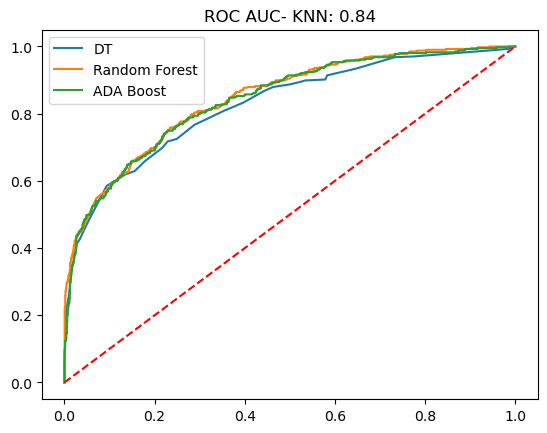

In [278]:
fpr_dt, tpr_dt, thres_dt= roc_curve(y_test, pred_dt_s_f)
fpr_rf_f, tpr_rf_f, thres_rf_f= roc_curve(y_test, pred_rf_final_s)
fpr_ada, tpr_ada, thres_ada= roc_curve(y_test, predict_ada_s)


plt.plot(fpr_dt, tpr_dt, label= 'DT')
plt.plot(fpr_rf, tpr_rf, label= 'Random Forest')
plt.plot(fpr_ada, tpr_ada, label= 'ADA Boost')

plt.plot([0,1],[0,1], color= 'red', ls= '--')

plt.title(f'ROC AUC- KNN: {round(roc_auc_score(y_test, predict_ada_s),2)}')
plt.legend()
plt.show()

In [279]:
pd.DataFrame({'FPR': fpr_ada, 'TPR': tpr_ada, 'THRESHOLD': thres_ada, 'YODENS INDEX': tpr_ada*(1-fpr_ada)}).sort_values(by= 'YODENS INDEX', ascending= True)

,FPR,TPR,THRESHOLD,YODENS INDEX
0,0.000000,0.000000,inf,0.000000
469,1.000000,1.000000,0.480924,0.000000
1,0.000000,0.002457,0.601851,0.002457
467,0.985562,0.997543,0.487249,0.014403
468,0.985562,1.000000,0.487245,0.014438
...,...,...,...,...
232,0.220967,0.739558,0.496457,0.576140
236,0.225361,0.744472,0.496404,0.576697
238,0.227872,0.746929,0.496338,0.576725
234,0.222222,0.742015,0.496432,0.577123


In [280]:
# Lets check variance in the model 

# k-fold cross validation 

from sklearn.model_selection import cross_val_score

In [281]:
cv_scores= cross_val_score(estimator= AdaBoostClassifier(n_estimators= 100), X= x_train, y= y_train, cv= 5, scoring='roc_auc')

In [282]:
cv_scores

array([0.85689004, 0.85043003, 0.85591731, 0.82530627, 0.84490542])

In [283]:
# How much % variation is there in the scores 

cv_scores.std()/cv_scores.mean()*100

1.3606630798225299

### Gradient boost

In [285]:
model_gdc= GradientBoostingClassifier()

In [286]:
model_gdc.fit(x_train,y_train)

GradientBoostingClassifier()

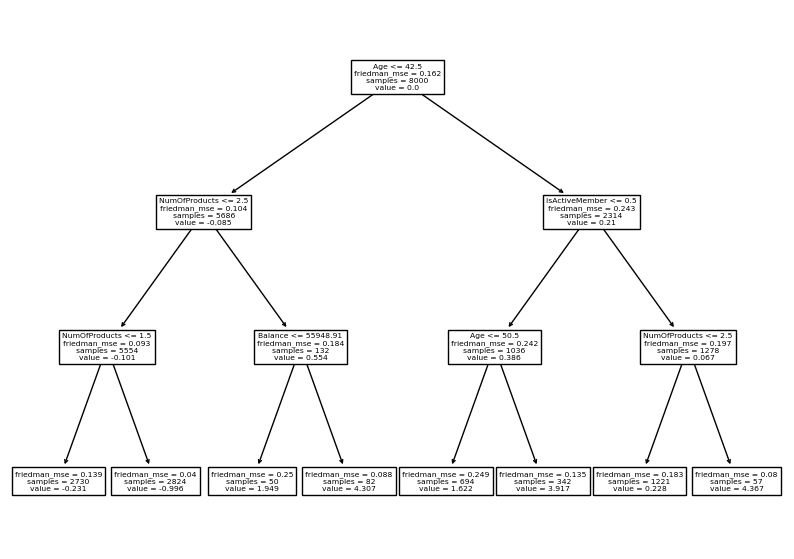

In [287]:
plt.figure(figsize=(10,7))
plot_tree(model_gdc[0][0], feature_names= x_train.columns.to_list())
plt.show()

In [288]:
x['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [289]:
model_gbm= GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 500, max_leaf_nodes= 12, max_depth= 7)

In [290]:
model_gbm.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_leaf_nodes=12,
                           n_estimators=500)

In [291]:
pred_gbm_s= model_gbm.predict_proba(x_test)[:,1]
pred_gbm_h= model_gbm.predict(x_test)

In [292]:
print(classification_report(y_test, pred_gbm_h))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.47      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [293]:
print(cohen_kappa_score(y_test, pred_gbm_h))

0.5096068380999429


In [294]:
print(roc_auc_score(y_test, pred_gbm_s))

0.8600264362976228


In [295]:
# This means the model is not overfit 
pred_gbm_s= model_gbm.predict_proba(x_train)[:,1]
pred_gbm_h= model_gbm.predict(x_train)
print(classification_report(y_train, pred_gbm_h))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6370
           1       0.81      0.51      0.63      1630

    accuracy                           0.88      8000
   macro avg       0.85      0.74      0.78      8000
weighted avg       0.87      0.88      0.87      8000



In [296]:
# lets fine tune the model 

grid= {'n_estimators': [210,220,230,240], 'min_samples_split': [100,200,300]}

In [297]:
gscv= GridSearchCV(estimator= GradientBoostingClassifier(learning_rate= 0.01), param_grid= grid, scoring= 'roc_auc', cv= 5, verbose=3)

In [298]:
gscv.fit(x_train_os, y_train_os)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END min_samples_split=100, n_estimators=210;, score=0.849 total time=   2.4s
[CV 2/5] END min_samples_split=100, n_estimators=210;, score=0.853 total time=   2.5s
[CV 3/5] END min_samples_split=100, n_estimators=210;, score=0.844 total time=   2.8s
[CV 4/5] END min_samples_split=100, n_estimators=210;, score=0.843 total time=   3.1s
[CV 5/5] END min_samples_split=100, n_estimators=210;, score=0.860 total time=   2.9s
[CV 1/5] END min_samples_split=100, n_estimators=220;, score=0.850 total time=   3.2s
[CV 2/5] END min_samples_split=100, n_estimators=220;, score=0.854 total time=   3.3s
[CV 3/5] END min_samples_split=100, n_estimators=220;, score=0.846 total time=   3.0s
[CV 4/5] END min_samples_split=100, n_estimators=220;, score=0.845 total time=   3.4s
[CV 5/5] END min_samples_split=100, n_estimators=220;, score=0.862 total time=   3.8s
[CV 1/5] END min_samples_split=100, n_estimators=230;, score=0.851 total time= 

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(learning_rate=0.01),
             param_grid={'min_samples_split': [100, 200, 300],
                         'n_estimators': [210, 220, 230, 240]},
             scoring='roc_auc', verbose=3)

In [299]:
gscv.best_score_

0.8537324807957237

In [300]:
gscv.best_params_

{'min_samples_split': 100, 'n_estimators': 240}

In [301]:
model_gbm_final= GradientBoostingClassifier(learning_rate= 0.01, **gscv.best_params_)

In [302]:
model_gbm_final.fit(x_train_os, y_train_os)

GradientBoostingClassifier(learning_rate=0.01, min_samples_split=100,
                           n_estimators=240)

In [303]:
print(roc_auc_score(y_test, pred_gbm_s))

ValueError: Found input variables with inconsistent numbers of samples: [2000, 8000]

In [304]:
print(cohen_kappa_score(y_test, pred_gbm_h))

ValueError: Found input variables with inconsistent numbers of samples: [2000, 8000]

In [ ]:
fpr_gbm, tpr_gbm, thre_gbm= roc_curve(y_test, pred_gbm_s)
fpr_dt, tpr_dt, thres_dt= roc_curve(y_test, pred_dt_s_f)
fpr_rf_f, tpr_rf_f, thres_rf_f= roc_curve(y_test, pred_rf_final_s)
fpr_ada, tpr_ada, thres_ada= roc_curve(y_test, predict_ada_s)


plt.plot(fpr_dt, tpr_dt, label= 'DT')
plt.plot(fpr_rf, tpr_rf, label= 'Random Forest')
plt.plot(fpr_ada, tpr_ada, label= 'ADA Boost')
plt.plot(fpr_gbm, tpr_gbm, label= 'GBM')

plt.plot([0,1],[0,1], color= 'red', ls= '--')

plt.title(f'ROC AUC- KNN: {round(roc_auc_score(y_test, predict_ada_s),2)}')
plt.legend()
plt.show()

## XG Boost

In [307]:
from xgboost import XGBClassifier

In [309]:
model_xgb= XGBClassifier(n_estimators= 500, gammma= 2, min_child_weight= 1)

In [311]:
model_xgb.fit(x_train_os, y_train_os)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gammma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [312]:
pred_xgb_s= model_xgb.predict_proba(x_test)[:,1]
pred_xgb_h= model_xgb.predict(x_test)

In [313]:
print(classification_report(y_test, pred_xgb_h))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1593
           1       0.58      0.55      0.56       407

    accuracy                           0.83      2000
   macro avg       0.74      0.72      0.73      2000
weighted avg       0.82      0.83      0.83      2000



In [314]:
print(cohen_kappa_score(y_test, pred_xgb_h))

0.45757029446184017


In [315]:
print(roc_auc_score(y_test, pred_xgb_s))

0.8140598225343987


In [316]:
fpr_xgb, tpr_xgb, thres_xgb= roc_curve(y_test, pred_xgb_h)
fpr_gbm, tpr_gbm, thre_gbm= roc_curve(y_test, pred_gbm_s)
fpr_dt, tpr_dt, thres_dt= roc_curve(y_test, pred_dt_s_f)
fpr_rf_f, tpr_rf_f, thres_rf_f= roc_curve(y_test, pred_rf_final_s)
fpr_ada, tpr_ada, thres_ada= roc_curve(y_test, predict_ada_s)


plt.plot(fpr_dt, tpr_dt, label= 'DT')
plt.plot(fpr_rf, tpr_rf, label= 'Random Forest')
plt.plot(fpr_ada, tpr_ada, label= 'ADA Boost')
plt.plot(fpr_gbm, tpr_gbm, label= 'GBM')
plt.plot(fpr_xgb, tpr_xgb, label= 'XBG')

plt.plot([0,1],[0,1], color= 'red', ls= '--')

plt.title(f'ROC AUC- KNN: {round(roc_auc_score(y_test, predict_ada_s),2)}')
plt.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2000, 8000]

## Voting

In [319]:
base_estimators= [('RF', RandomForestClassifier(max_depth=10, n_estimators= 110)), 
                  ('GBM', GradientBoostingClassifier(n_estimators= 220, max_depth= 7)), 
                  ('XGB', XGBClassifier(n_estimators= 200, gamma= 2, min_child_weight= 1))]

model_vot= VotingClassifier(estimators= base_estimators, voting= 'soft')

In [321]:
model_vot.fit(x_train_os, y_train_os)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=110)),
                             ('GBM',
                              GradientBoostingClassifier(max_depth=7,
                                                         n_estimators=220)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [322]:
pred_vot_s= model_vot.predict_proba(x_test)[:,1]
pred_vot_h= model_vot.predict(x_test)

In [323]:
print(classification_report(y_test, pred_vot_h))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1593
           1       0.55      0.62      0.59       407

    accuracy                           0.82      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.83      0.82      0.82      2000



In [324]:
print(roc_auc_score(y_test, pred_vot_s))

0.8509403085674272


In [325]:
print(cohen_kappa_score(y_test, pred_vot_h))

0.4718879637529789


## Stacking

In [327]:
model_stack= StackingClassifier(estimators= base_estimators, final_estimator= DecisionTreeClassifier(max_depth=7))

In [328]:
model_stack.fit(x_train_os, y_train_os)

StackingClassifier(estimators=[('RF',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=110)),
                               ('GBM',
                                GradientBoostingClassifier(max_depth=7,
                                                           n_estimators=220)),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=Fal...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=DecisionTreeClassifier(max_depth=7))

In [329]:
pred_stack_s= model_stack.predict_proba(x_test)[:,1]
pred_stack_h= model_stack.predict(x_test)

In [330]:
print(classification_report(y_test, pred_stack_h))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.71      0.37      0.49       407

    accuracy                           0.84      2000
   macro avg       0.78      0.67      0.70      2000
weighted avg       0.83      0.84      0.82      2000



In [331]:
print(cohen_kappa_score(y_test, pred_stack_h))

0.4025120715037591


In [332]:
print(roc_auc_score(y_test, pred_stack_s))

0.7550061617858228
